## Apply convolutional neural network on any image dataset. Form confusion matrix for maximum 10 classes. Do ablation studies to find better accuracy (change size of filters, number of filters, number of pooling layers, number of convolution followed by fully connected networks etc) 

In [10]:
import keras
from keras import models,layers,datasets

In [15]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

In [17]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [19]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [28]:
from keras.utils import to_categorical
y_train = to_categorical(y_train,num_classes=10) 
y_test = to_categorical(y_test,num_classes=10)

In [38]:
model = models.Sequential()

model.add(layers.Conv2D(32,(3,3),activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Conv2D(32,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Dropout(0.2))

model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.BatchNormalization())

model.add(layers.Dense(10,activation='softmax'))

In [39]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='acc')

In [43]:
model.fit(x_train,y_train,epochs=20,batch_size=25)

Epoch 1/20
2000/2000 [==============================] - 103s 52ms/step - loss: 1.0149 - acc: 0.6445
Epoch 2/20
2000/2000 [==============================] - 84s 42ms/step - loss: 0.9349 - acc: 0.6745
Epoch 3/20
2000/2000 [==============================] - 87s 43ms/step - loss: 0.9016 - acc: 0.6843
Epoch 4/20
2000/2000 [==============================] - 77s 39ms/step - loss: 0.8411 - acc: 0.7056
Epoch 5/20
2000/2000 [==============================] - 78s 39ms/step - loss: 0.7863 - acc: 0.7229
Epoch 6/20
2000/2000 [==============================] - 78s 39ms/step - loss: 0.7528 - acc: 0.7359
Epoch 7/20
2000/2000 [==============================] - 75s 37ms/step - loss: 0.7496 - acc: 0.7368
Epoch 8/20
2000/2000 [==============================] - 74s 37ms/step - loss: 0.7040 - acc: 0.7534
Epoch 9/20
2000/2000 [==============================] - 75s 38ms/step - loss: 0.6744 - acc: 0.7620
Epoch 10/20
2000/2000 [==============================] - 75s 38ms/step - loss: 0.6445 - acc: 0.7743
Epoch 11

In [45]:
model.evaluate(x_train,y_train)[1]

1563/1563 [==============================] - 20s 13ms/step - loss: 17.8430 - acc: 0.1676


0.1675799936056137

In [57]:
y_pred = model.predict(x_test)

313/313 [==============================] - 3s 11ms/step


In [58]:
import numpy as np
y_pred = np.argmax(y_pred,axis=1)

In [60]:
y_test = np.argmax(y_test,axis=1)

In [64]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

<AxesSubplot:>

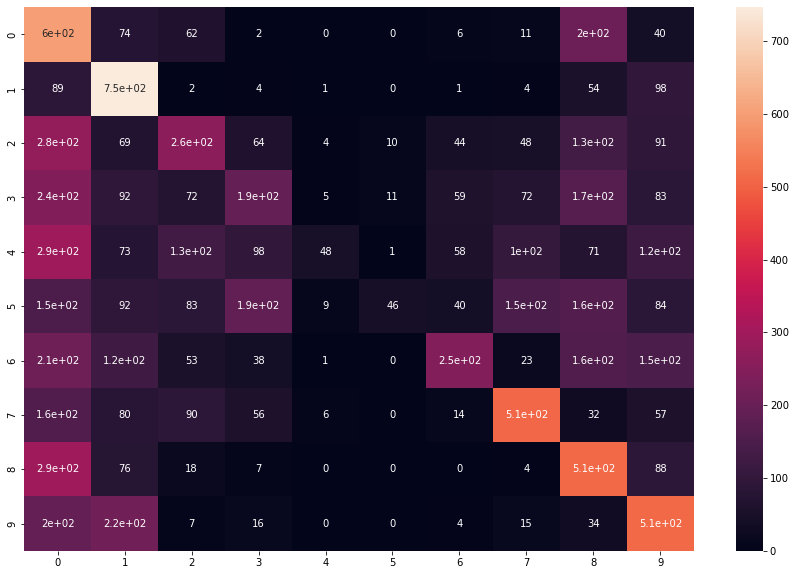

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
sns.heatmap(cm,annot=True)

In [95]:
classes = { 0: "airplane", 1: "automobile", 2: "bird", 3: "cat", 4: "deer", 5: "dog",
           6: "frog", 7: "horse", 8: "ship", 9: "truck"}
y_pred = [classes[i] for i in y_pred]

90


'airplane'

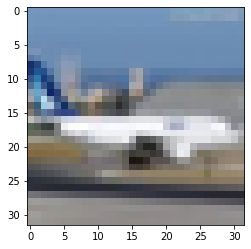

In [104]:
a = int(input())
plt.imshow(x_test[a])
y_pred[a]